<a href="https://colab.research.google.com/github/msrahulvarma/RahulVarma_INFO5731_Fall2023/blob/main/Muppalla_rahul_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [8]:
import pandas as pd
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag
from collections import Counter
import nltk

# Make sure to download the necessary NLTK datasets in your environment
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# Function to load the dataset
def load_dataset(filepath):
    return pd.read_csv(filepath)

# Function to count n-grams frequency
def count_ngrams(data, n):
    ngrams_freq = Counter()
    for review in data:
        tokens = word_tokenize(review.lower())  # Convert to lower case
        ngrams_freq.update(FreqDist(ngrams(tokens, n)))
    return ngrams_freq

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(data):
    bigram_freq = Counter()
    unigram_freq = Counter()

    for review in data:
        tokens = word_tokenize(review.lower())  # Convert to lower case
        bigram_freq.update(FreqDist(bigrams(tokens)))
        unigram_freq.update(FreqDist(tokens))

    bigram_probabilities = {bg: bigram_freq[bg] / unigram_freq[bg[0]] for bg in bigram_freq}
    return bigram_probabilities

# Function to extract noun phrases and calculate relative probabilities
def extract_noun_phrases(data):
    noun_phrases = Counter()
    for review in data:
        tokens = word_tokenize(review.lower())  # Convert to lower case
        tagged_tokens = pos_tag(tokens)
        nouns = [word for word, tag in tagged_tokens if tag.startswith('NN')]
        noun_phrases.update(nouns)
    return noun_phrases

# Function to calculate relative probabilities
def calculate_relative_probabilities(noun_phrases):
    max_freq = max(noun_phrases.values())
    relative_probabilities = {np: freq / max_freq for np, freq in noun_phrases.items()}
    return relative_probabilities

# Main function to perform the analysis
def main():
    filepath = '/content/cleaned_reviews.csv'  # Replace with your file path
    data_df = load_dataset(filepath)
    reviews = data_df['Cleaned Review']  # Replace with your actual column name

    # Task 1: Count 3-grams frequency
    trigram_freq = count_ngrams(reviews, 3)

    # Task 2: Calculate bigram probabilities
    bigram_probs = calculate_bigram_probabilities(reviews)

    # Task 3: Extract noun phrases and calculate relative probabilities
    noun_phrases_freq = extract_noun_phrases(reviews)
    relative_probs = calculate_relative_probabilities(noun_phrases_freq)

    # Print out the results
    print("3-grams Frequency:")
    print(trigram_freq.most_common(10))  # Display top 10 for brevity
    print("\nBigram Probabilities:")
    print({k: v for k, v in list(bigram_probs.items())[:10]})  # Display top 10 for brevity
    print("\nRelative Probabilities of Noun Phrases:")
    print(relative_probs)

# Run the main function
main()


3-grams Frequency:
[(('madelein', 'yuna', 'voyl'), 1600), (('john', 'david', 'washington'), 800), (('rogu', 'one', 'star'), 600), (('one', 'star', 'war'), 600), (('star', 'war', 'stori'), 600), (('director', 'gareth', 'edward'), 600), (('film', 'feel', 'littl'), 400), (('feel', 'littl', 'safe'), 400), (('scifi', 'film', 'feel'), 400), (('gareth', 'edward', 'rogu'), 400)]

Bigram Probabilities:
{('lesson', 'movi'): 1.0, ('movi', 'industri'): 0.013513513513513514, ('industri', 'use'): 1.0, ('use', 'budget'): 0.09090909090909091, ('budget', 'million'): 0.3333333333333333, ('million', 'dollar'): 0.14285714285714285, ('dollar', 'use'): 1.0, ('use', 'splendidli'): 0.09090909090909091, ('splendidli', 'cinematographi'): 1.0, ('cinematographi', 'amaz'): 0.16666666666666666}

Relative Probabilities of Noun Phrases:
{'lesson': 0.018867924528301886, 'movi': 1.0, 'industri': 0.018867924528301886, 'use': 0.16981132075471697, 'budget': 0.11320754716981132, 'dollar': 0.018867924528301886, 'cinematogra

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to load the dataset
def load_dataset(filepath):
    return pd.read_csv(filepath)

# Function to create TF-IDF matrix and return the vectorizer along with the matrix
def build_tfidf_matrix(data):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    return tfidf_vectorizer, tfidf_matrix

# Function to rank documents based on cosine similarity
def rank_documents(query, tfidf_vectorizer, tfidf_matrix):
    query_vector = tfidf_vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    ranked_documents = cosine_similarities.argsort()[::-1]
    return ranked_documents, cosine_similarities

# Main function to perform the analysis
def main():
    filepath = '/content/cleaned_reviews.csv'
    data_df = load_dataset(filepath)
    documents = data_df['Cleaned Review']
    # Task 1: Build TF-IDF vectorizer and matrix
    tfidf_vectorizer, tfidf_matrix = build_tfidf_matrix(documents)

    # Design a query
    query = "An outstanding movie with a haunting performance and best character development"

    # Task 2: Rank the documents with respect to the query using cosine similarity
    ranked_documents, cosine_similarities = rank_documents(query, tfidf_vectorizer, tfidf_matrix)

    # Print out the ranked documents and their similarity scores
    print("Ranked documents (from most to least relevant):")
    for rank, doc_index in enumerate(ranked_documents):
        print(f"Document {doc_index}: Score {cosine_similarities[doc_index]}")

        # For brevity, print details of the top 5 documents
        if rank < 5:
            print(f"Document content: {documents[doc_index]}")
            print("-----")

# Run the main function
main()


Streaming output truncated to the last 5000 lines.
Document content: lesson movi industri use budget million dollar use splendidli cinematographi amaz terribl surpris rogu one act great stori decentit wasnt without problem though stori move increas pace point lose track what happen suspens disbelief need momentsth theme stori make ai robot think succeed expens human human stori end one face except joshuath dynam joshua alfi far best part movi act great twoit good movi great mean im support movi tri someth newoveral think gareth edward given project filmmak everywher learn budget use
-----
Document 4800: Score 0.11017953775439547
Document content: lesson movi industri use budget million dollar use splendidli cinematographi amaz terribl surpris rogu one act great stori decentit wasnt without problem though stori move increas pace point lose track what happen suspens disbelief need momentsth theme stori make ai robot think succeed expens human human stori end one face except joshuath dyna

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [14]:
import numpy as np


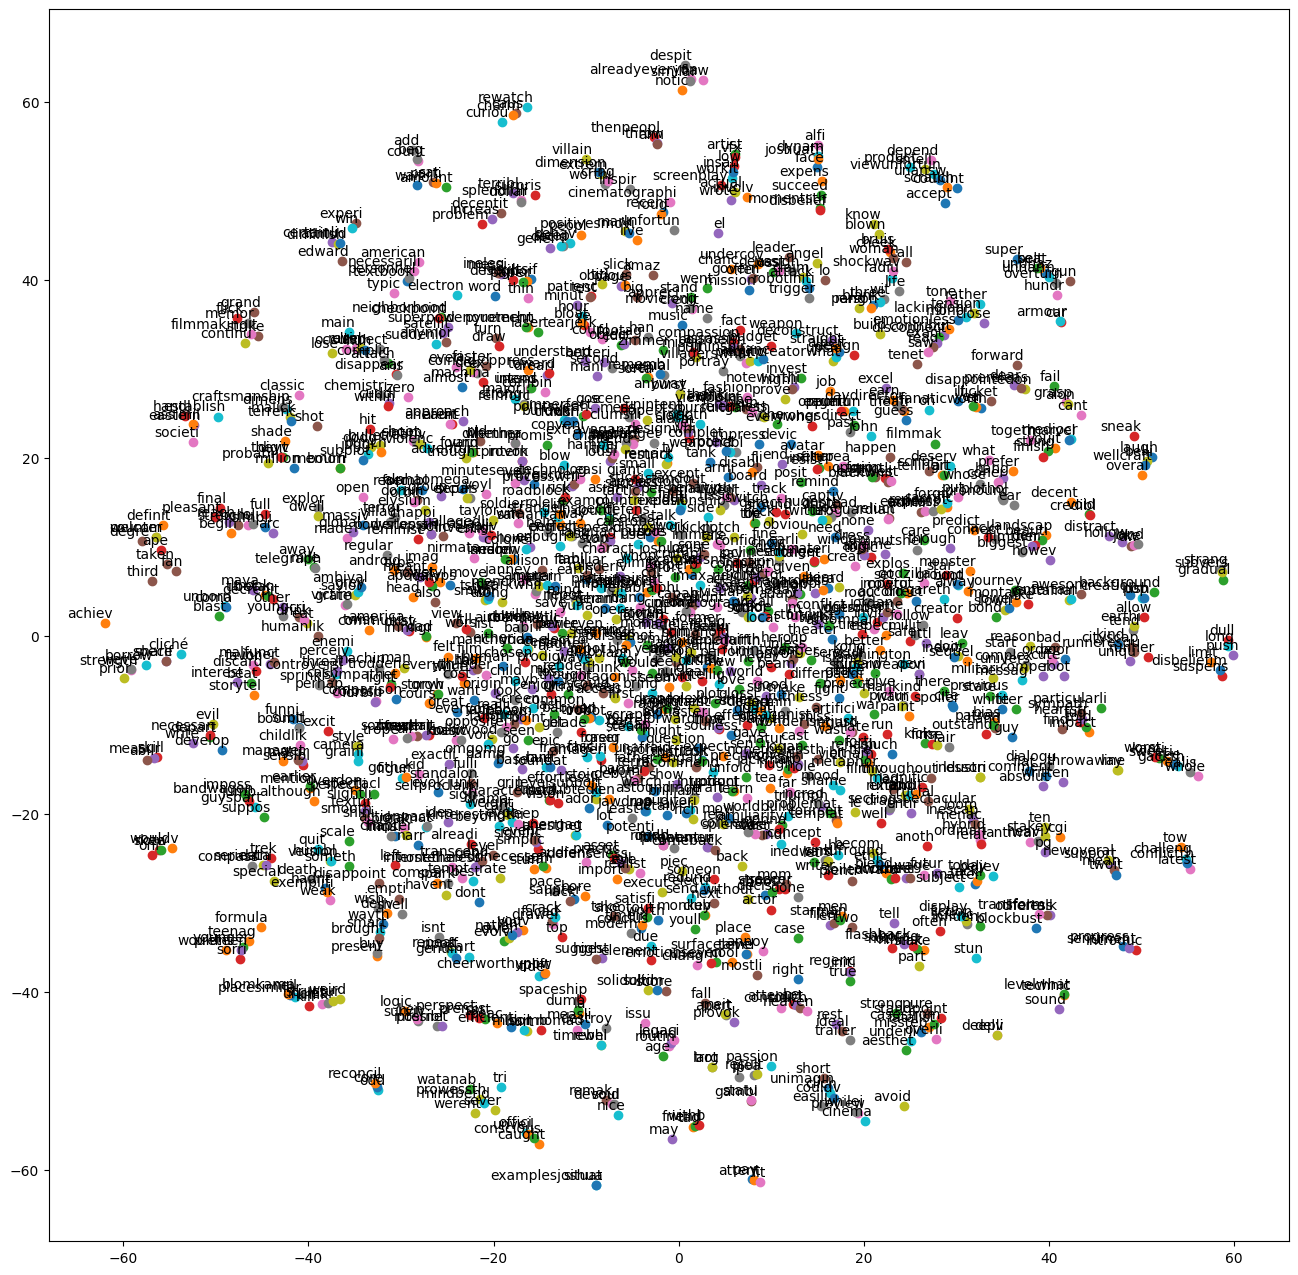

In [15]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

# Load your dataset
def load_data(filepath):
    return pd.read_csv(filepath)

# Assuming the text data is in a column named 'Cleaned Review'
def preprocess(data):
    # Tokenize the text into sentences and then into words
    sentences = [gensim.utils.simple_preprocess(review) for review in data]
    return sentences

# Train a word2vec model
def train_word2vec(sentences):
    # Word vector dimensionality
    feature_size = 300
    # Context window size
    window_context = 10
    # Minimum word count
    min_word_count = 1
    # Downsample setting for frequent words
    sample = 1e-3

    w2v_model = Word2Vec(sentences, vector_size=feature_size, window=window_context, min_count=min_word_count, sample=sample, epochs=100)
    return w2v_model

# Visualize word embeddings
def tsne_plot(model):
    # Create a list of word vectors. Note: there are more efficient ways to do this, but this approach is more clear for this example
    word_vectors = [model.wv[word] for word in model.wv.index_to_key]

    # Convert the list of word vectors into a 2D array with the shape (n_words, vector_size)
    word_vectors = np.array(word_vectors)

    # Perform t-SNE
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(word_vectors)

    # Plotting the results
    plt.figure(figsize=(16, 16))
    for i, word in enumerate(model.wv.index_to_key):
        plt.scatter(new_values[i][0], new_values[i][1])
        plt.annotate(word, xy=(new_values[i][0], new_values[i][1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

# Main function
def main():
    filepath = '/content/cleaned_reviews.csv'
    data_df = load_data(filepath)
    sentences = preprocess(data_df['Cleaned Review'])
    w2v_model = train_word2vec(sentences)
    tsne_plot(w2v_model)

# Run the main function
main()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [16]:
# The GitHub link of your final csv file


# Link: https://github.com/msrahulvarma/RahulVarma_INFO5731_Fall2023/blob/main/annotated_reviews.csv



